In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_csv('Social_Network_Ads.csv')
df=df.iloc[:,2:]
df.sample(5)

,Age,EstimatedSalary,Purchased
384,57,33000,1
206,55,130000,1
280,59,88000,1
325,41,60000,0
210,48,96000,1


# Train test split

In [19]:
!pip install scikit-learn


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)
X_train.shape,X_test.shape

((280, 2), (120, 2))

# StandardScaler



In [45]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [35]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [46]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [49]:
X_test_scaled.sample(5)

,Age,EstimatedSalary
24,-1.457292,-1.209023
119,0.895664,-0.543885
18,1.679982,1.740720
107,0.013305,-0.254694
42,-1.065133,0.410444


In [51]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [53]:
np.round(X_train_scaled.describe(),1)


,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


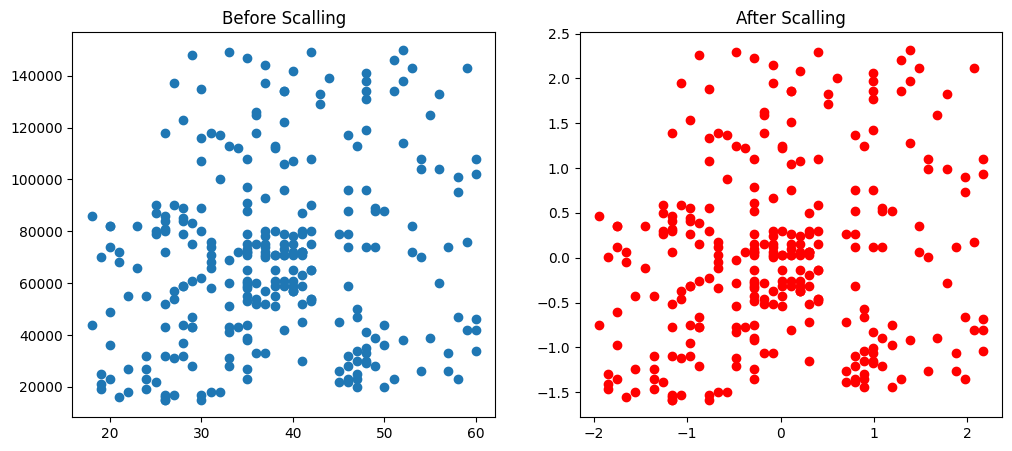

In [62]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title('Before Scalling')
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After Scalling')
plt.show()

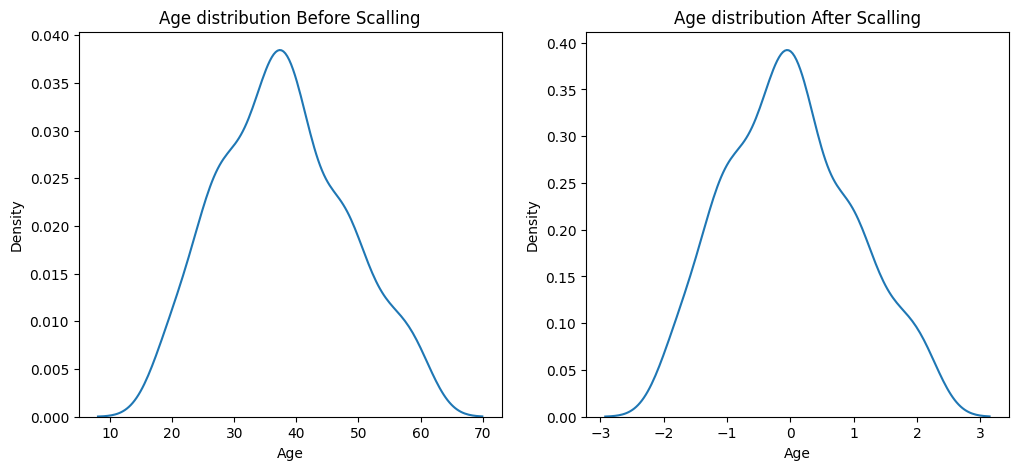

In [69]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Age distribution Before Scalling')
sns.kdeplot(X_train['Age'],ax=ax1)
ax2.set_title('Age distribution After Scalling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
plt.show()

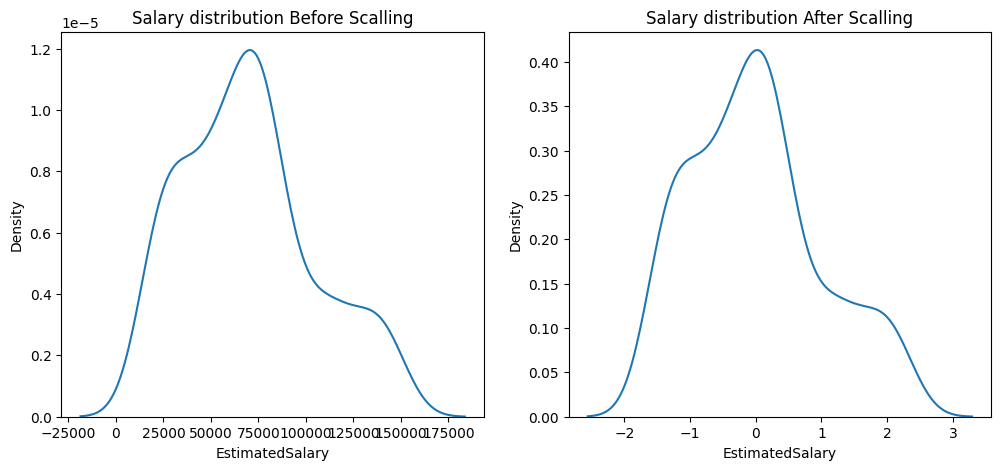

In [70]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.set_title('Salary distribution Before Scalling')
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
ax2.set_title('Salary distribution After Scalling')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

In [73]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr_scaled=LogisticRegression()


In [74]:
lr.fit(X_train,Y_train)
lr_scaled.fit(X_train_scaled,Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [81]:
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

In [82]:
from sklearn.metrics import accuracy_score
print("Actual_score",accuracy_score(Y_test,y_pred))
print("Scaled_score",accuracy_score(Y_test,y_pred_scaled))

Actual_score 0.875
Scaled_score 0.8666666666666667


In [85]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt_scaled=DecisionTreeClassifier()


In [88]:
dt.fit(X_train,Y_train)
dt_scaled.fit(X_train_scaled,Y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [90]:
y_pred=dt.predict(X_test)
y_pred_scaled=dt_scaled.predict(X_test_scaled)

In [92]:
print("Actual",accuracy_score(Y_test,y_pred))
print("Scaled",accuracy_score(Y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875


In [93]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [97]:
new_data = pd.DataFrame({
    'Age': [5, 90, 95],
    'EstimatedSalary': [1000, 250000, 350000],
    'Purchased': [0, 1, 1]
})
df = pd.concat([df, new_data], ignore_index=True)

In [98]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
401,90,250000,1
402,95,350000,1
403,5,1000,0
404,90,250000,1


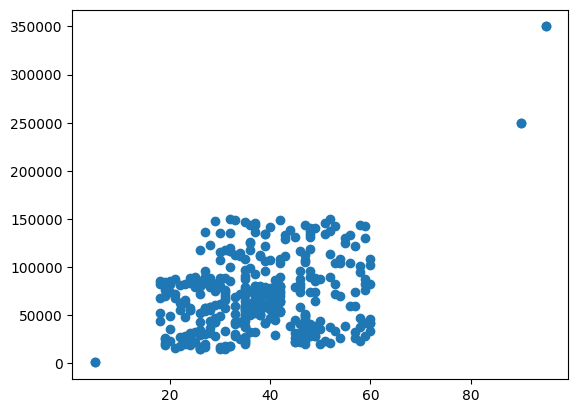

In [99]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((284, 2), (122, 2))

In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [102]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

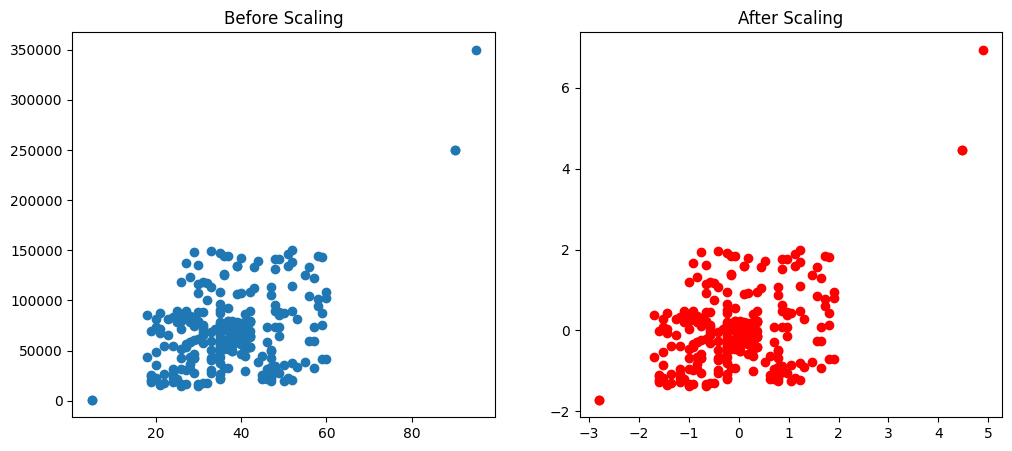

In [103]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()